In [1]:
import numpy as np
import wrf
from wrf import to_np, getvar, get_basemap, latlon_coords
import matplotlib.pyplot as plt
#from matplotlib.cm import get_cmap
#import cartopy.crs as crs
#from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset
import xarray as xr
from scipy import ndimage
import scipy

In [15]:
date='21'
hour='21'

file0_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_ens_2/wrfout_d01_2017-01-{date}_{hour}:00:00"
file1_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_warm_2/wrfout_d01_2017-01-{date}_{hour}:00:00"
file2_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_cool_2/wrfout_d01_2017-01-{date}_{hour}:00:00"

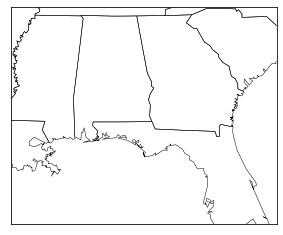

In [16]:
ncfile12_wrf_d02 = Dataset(file1_wrf_d02)
bleh = getvar(ncfile12_wrf_d02,"td2")

thecropper1 = 325
thecropper3 = 550

thecropper2 = 275
thecropper4 = 550

lats4, lons4 = latlon_coords(bleh[thecropper1:thecropper3,thecropper2:thecropper4])
bm = get_basemap(bleh[thecropper1:thecropper3,thecropper2:thecropper4])

x, y = bm(to_np(lons4), to_np(lats4))

levels=[0,10,20,30,40,50,60,70,80]
levels_gpht = np.arange(520., 588., 6.)

bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates()
plt.show()

In [17]:
ncfile0 = Dataset(file0_wrf_d02)
ncfile1 = Dataset(file1_wrf_d02)
ncfile2 = Dataset(file2_wrf_d02)

xrfile0 = xr.open_dataset(file0_wrf_d02)
xrfile1 = xr.open_dataset(file1_wrf_d02)
xrfile2 = xr.open_dataset(file2_wrf_d02)

26.749353


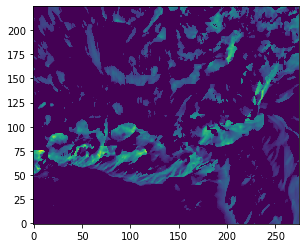

In [18]:
ThetaPT = xrfile0['T']+300 #potential temp
ThetaVPT = ThetaPT*(1+0.608*xrfile0['QVAPOR']-xrfile0['QCLOUD']-xrfile0['QRAIN']) # virtual potential temp

ThetaVPT = ThetaVPT[0,:,:,:]
ThetaVPT_mean=scipy.ndimage.uniform_filter(ThetaVPT[:,:,:],size=(0,25,25))
Boyancy=(9.81*(ThetaVPT-ThetaVPT_mean))/ThetaVPT_mean
NAN=np.copy(Boyancy)
for lev in range(Boyancy.shape[0]):
    NAN[lev,:,:]=(Boyancy[lev,:,:] > -0.005)
    NAN[lev,:,:][NAN[lev,:,:] == 1]=np.nan
    if lev > 1:
        NAN[lev,:,:]=NAN[lev,:,:]+NAN[lev-1,:,:]
Boyancy_Low=np.copy(Boyancy)
Boyancy_Low[np.isnan(NAN)]=np.nan
Boyancy_Integral=np.nansum(Boyancy_Low, axis=0)*250.
cold_pool_intensity_0 = np.sqrt(-2*Boyancy_Integral)
print(cold_pool_intensity_0[thecropper1:thecropper3,thecropper2:thecropper4].max())
plt.imshow(cold_pool_intensity_0[thecropper1:thecropper3,thecropper2:thecropper4],origin='lower');plt.show()

28.91957


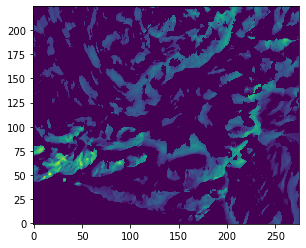

In [19]:
ThetaPT = xrfile1['T']+300 #potential temp
ThetaVPT = ThetaPT*(1+0.608*xrfile1['QVAPOR']-xrfile1['QCLOUD']-xrfile1['QRAIN']) # virtual potential temp

ThetaVPT = ThetaVPT[0,:,:,:]
ThetaVPT_mean=scipy.ndimage.uniform_filter(ThetaVPT[:,:,:],size=(0,25,25))
Boyancy=(9.81*(ThetaVPT-ThetaVPT_mean))/ThetaVPT_mean
NAN=np.copy(Boyancy)
for lev in range(Boyancy.shape[0]):
    NAN[lev,:,:]=(Boyancy[lev,:,:] > -0.005)
    NAN[lev,:,:][NAN[lev,:,:] == 1]=np.nan
    if lev > 1:
        NAN[lev,:,:]=NAN[lev,:,:]+NAN[lev-1,:,:]
Boyancy_Low=np.copy(Boyancy)
Boyancy_Low[np.isnan(NAN)]=np.nan
Boyancy_Integral=np.nansum(Boyancy_Low, axis=0)*250.
cold_pool_intensity_1 = np.sqrt(-2*Boyancy_Integral)
print(cold_pool_intensity_1[thecropper1:thecropper3,thecropper2:thecropper4].max())
plt.imshow(cold_pool_intensity_1[thecropper1:thecropper3,thecropper2:thecropper4],origin='lower');plt.show()

23.00497


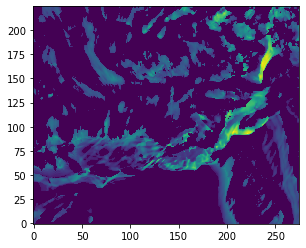

In [20]:
ThetaPT = xrfile2['T']+300 #potential temp
ThetaVPT = ThetaPT*(1+0.608*xrfile2['QVAPOR']-xrfile2['QCLOUD']-xrfile2['QRAIN']) # virtual potential temp

ThetaVPT = ThetaVPT[0,:,:,:]
ThetaVPT_mean=scipy.ndimage.uniform_filter(ThetaVPT[:,:,:],size=(0,25,25))
Boyancy=(9.81*(ThetaVPT-ThetaVPT_mean))/ThetaVPT_mean
NAN=np.copy(Boyancy)
for lev in range(Boyancy.shape[0]):
    NAN[lev,:,:]=(Boyancy[lev,:,:] > -0.005)
    NAN[lev,:,:][NAN[lev,:,:] == 1]=np.nan
    if lev > 1:
        NAN[lev,:,:]=NAN[lev,:,:]+NAN[lev-1,:,:]
Boyancy_Low=np.copy(Boyancy)
Boyancy_Low[np.isnan(NAN)]=np.nan
Boyancy_Integral=np.nansum(Boyancy_Low, axis=0)*250.
cold_pool_intensity_2 = np.sqrt(-2*Boyancy_Integral)
print(cold_pool_intensity_2[thecropper1:thecropper3,thecropper2:thecropper4].max())
plt.imshow(cold_pool_intensity_2[thecropper1:thecropper3,thecropper2:thecropper4],origin='lower');plt.show()

In [24]:
coldpool0 = []
coldpool1 = []
coldpool2 = []

date='21'
hours=['18','19','20','21']

for hour in hours:
    file0_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_ens_2/wrfout_d01_2017-01-{date}_{hour}:00:00"
    file1_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_warm_2/wrfout_d01_2017-01-{date}_{hour}:00:00"
    file2_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_cool_2/wrfout_d01_2017-01-{date}_{hour}:00:00"

    ncfile0 = Dataset(file0_wrf_d02)
    ncfile1 = Dataset(file1_wrf_d02)
    ncfile2 = Dataset(file2_wrf_d02)

    xrfile0 = xr.open_dataset(file0_wrf_d02)
    xrfile1 = xr.open_dataset(file1_wrf_d02)
    xrfile2 = xr.open_dataset(file2_wrf_d02)

    ThetaPT = xrfile0['T']+300 #potential temp
    ThetaVPT = ThetaPT*(1+0.608*xrfile0['QVAPOR']-xrfile0['QCLOUD']-xrfile0['QRAIN']) # virtual potential temp

    ThetaVPT = ThetaVPT[0,:,:,:]
    ThetaVPT_mean=scipy.ndimage.uniform_filter(ThetaVPT[:,:,:],size=(0,25,25))
    Boyancy=(9.81*(ThetaVPT-ThetaVPT_mean))/ThetaVPT_mean
    NAN=np.copy(Boyancy)
    for lev in range(Boyancy.shape[0]):
        NAN[lev,:,:]=(Boyancy[lev,:,:] > -0.005)
        NAN[lev,:,:][NAN[lev,:,:] == 1]=np.nan
        if lev > 1:
            NAN[lev,:,:]=NAN[lev,:,:]+NAN[lev-1,:,:]
    Boyancy_Low=np.copy(Boyancy)
    Boyancy_Low[np.isnan(NAN)]=np.nan
    Boyancy_Integral=np.nansum(Boyancy_Low, axis=0)*250.
    cold_pool_intensity_0 = np.sqrt(-2*Boyancy_Integral)
    print(cold_pool_intensity_0[thecropper1:thecropper3,thecropper2:thecropper4].max())
    #plt.imshow(cold_pool_intensity_0[thecropper1:thecropper3,thecropper2:thecropper4],origin='lower');plt.show()
    coldpool0.append(cold_pool_intensity_0[thecropper1:thecropper3,thecropper2:thecropper4].max())

    ThetaPT = xrfile1['T']+300 #potential temp
    ThetaVPT = ThetaPT*(1+0.608*xrfile1['QVAPOR']-xrfile1['QCLOUD']-xrfile1['QRAIN']) # virtual potential temp

    ThetaVPT = ThetaVPT[0,:,:,:]
    ThetaVPT_mean=scipy.ndimage.uniform_filter(ThetaVPT[:,:,:],size=(0,25,25))
    Boyancy=(9.81*(ThetaVPT-ThetaVPT_mean))/ThetaVPT_mean
    NAN=np.copy(Boyancy)
    for lev in range(Boyancy.shape[0]):
        NAN[lev,:,:]=(Boyancy[lev,:,:] > -0.005)
        NAN[lev,:,:][NAN[lev,:,:] == 1]=np.nan
        if lev > 1:
            NAN[lev,:,:]=NAN[lev,:,:]+NAN[lev-1,:,:]
    Boyancy_Low=np.copy(Boyancy)
    Boyancy_Low[np.isnan(NAN)]=np.nan
    Boyancy_Integral=np.nansum(Boyancy_Low, axis=0)*250.
    cold_pool_intensity_1 = np.sqrt(-2*Boyancy_Integral)
    print(cold_pool_intensity_1[thecropper1:thecropper3,thecropper2:thecropper4].max())
    #plt.imshow(cold_pool_intensity_1[thecropper1:thecropper3,thecropper2:thecropper4],origin='lower');plt.show()
    coldpool1.append(cold_pool_intensity_1[thecropper1:thecropper3,thecropper2:thecropper4].max())

    ThetaPT = xrfile2['T']+300 #potential temp
    ThetaVPT = ThetaPT*(1+0.608*xrfile2['QVAPOR']-xrfile2['QCLOUD']-xrfile2['QRAIN']) # virtual potential temp

    ThetaVPT = ThetaVPT[0,:,:,:]
    ThetaVPT_mean=scipy.ndimage.uniform_filter(ThetaVPT[:,:,:],size=(0,25,25))
    Boyancy=(9.81*(ThetaVPT-ThetaVPT_mean))/ThetaVPT_mean
    NAN=np.copy(Boyancy)
    for lev in range(Boyancy.shape[0]):
        NAN[lev,:,:]=(Boyancy[lev,:,:] > -0.005)
        NAN[lev,:,:][NAN[lev,:,:] == 1]=np.nan
        if lev > 1:
            NAN[lev,:,:]=NAN[lev,:,:]+NAN[lev-1,:,:]
    Boyancy_Low=np.copy(Boyancy)
    Boyancy_Low[np.isnan(NAN)]=np.nan
    Boyancy_Integral=np.nansum(Boyancy_Low, axis=0)*250.
    cold_pool_intensity_2 = np.sqrt(-2*Boyancy_Integral)
    print(cold_pool_intensity_2[thecropper1:thecropper3,thecropper2:thecropper4].max())
    #plt.imshow(cold_pool_intensity_2[thecropper1:thecropper3,thecropper2:thecropper4],origin='lower');plt.show()
    coldpool2.append(cold_pool_intensity_2[thecropper1:thecropper3,thecropper2:thecropper4].max())

24.524342
27.032183
22.64188
25.230034
27.865156
24.177317
32.316902
29.887875
26.066076
26.749353
28.91957
23.00497


In [27]:
np.mean(coldpool0)

27.205156

In [28]:
np.mean(coldpool1)

28.426197

In [29]:
np.mean(coldpool2)

23.97256